# EXPLORING SVMS

In [151]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
from scipy.io import loadmat
%matplotlib inline


In [152]:
raw_data = pd.read_csv('breast-cancer-wisconsin.data')
raw_data.head(10)

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
5,1018099,1,1,1,1,2,10,3,1,1,2
6,1018561,2,1,2,1,2,1,3,1,1,2
7,1033078,2,1,1,1,2,1,1,1,5,2
8,1033078,4,2,1,1,2,1,2,1,1,2
9,1035283,1,1,1,1,1,1,3,1,1,2


In [153]:
data = raw_data
data['y'] = raw_data['2.1']
#data.head(10)
X_train, X_test, y_train, y_test = train_test_split(data[['1000025','5','1.1','1.2','2','1.3','3','1.4','1.5']], data['y'], test_size=0.30, random_state=42)

#THIS Normalizes all the data
x = X_train.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_train = pd.DataFrame(x_scaled)

x = X_test.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_test = pd.DataFrame(x_scaled)
X_test.columns = ['1000025','5','1.1','1.2','2','1.3','3','1.4','1.5']
X_train.columns = ['1000025','5','1.1','1.2','2','1.3','3','1.4','1.5']
##converting all lesion values to appropriate ones
y_train[y_train==2] = 0
y_train[y_train==4] = 1
y_test[y_test==2] = 0
y_test[y_test==4] = 1


/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [154]:
#data.head(10)
#positive = data[data['y'].isin([4])]
#negative = data[data['y'].isin([2])]
#print(data)
#fig, ax = plt.subplots(figsize=(12,8))
#ax.scatter(positive['1.2'], positive['1.1'], s=50, marker='x', label='Positive')
#ax.scatter(negative['1.2'], negative['1.1'], s=50, marker='o', label='Negative')
#ax.legend()

In [155]:
from sklearn import svm
svc = svm.LinearSVC(C=1, loss='hinge', max_iter=5000)
svc


LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=5000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [156]:
svc.fit(X_train[['1000025','5','1.1','1.2','2','1.3','3','1.4','1.5']], y_train)
svc.score(X_test[['1000025','5','1.1','1.2','2','1.3','3','1.4','1.5']], y_test)

0.96097560975609753

In [157]:
svc2 = svm.LinearSVC(C=1000, loss='hinge', max_iter=5000)
svc2.fit(X_train[['1000025','5','1.1','1.2','2','1.3','3','1.4','1.5']], y_train)
svc2.score(X_test[['1000025','5','1.1','1.2','2','1.3','3','1.4','1.5']], y_test)

0.97560975609756095

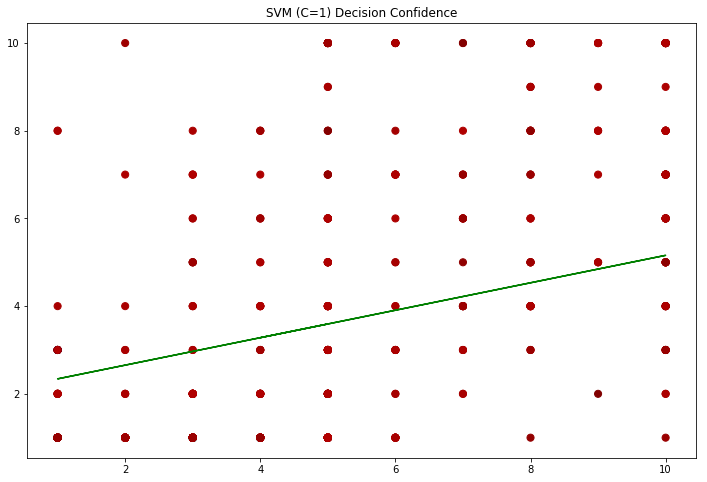

In [158]:
data['SVM 1 Confidence'] = svc.decision_function(data[['1000025','5','1.1','1.2','2','1.3','3','1.4','1.5']])

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['5'], data['1.1'], s=50, c=data['SVM 1 Confidence'], cmap='seismic')
ax.set_title('SVM (C=1) Decision Confidence')
plt.plot(data['5'], -(svc.coef_[0][0]*data['5']+svc.intercept_[0])/svc.coef_[0][1], c='green')

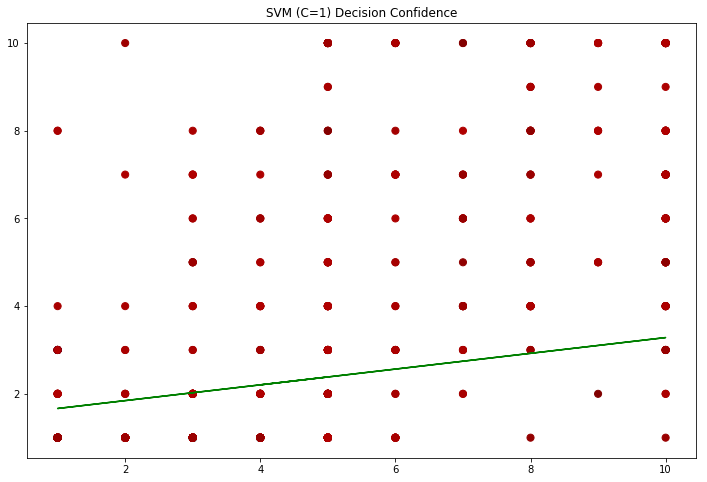

In [159]:
data['SVM 1 Confidence'] = svc.decision_function(data[['1000025','5','1.1','1.2','2','1.3','3','1.4','1.5']])

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['5'], data['1.1'], s=50, c=data['SVM 1 Confidence'], cmap='seismic')
ax.set_title('SVM (C=1) Decision Confidence')
plt.plot(data['5'], -(svc2.coef_[0][0]*data['5']+svc2.intercept_[0])/svc2.coef_[0][1], c='green')

In [160]:
from sklearn import svm, grid_search
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    gammas = [0.001, 0.01, 0.1, 1, 10, 100]
    d = [1,2,3,4,5]
    param_grid = {'C': Cs, 'gamma' : gammas,'degree':d}
    search = grid_search.GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    search.fit(X, y)
    search.best_params_
    return search.best_params_

In [161]:
svc_param_selection(X_train[['1000025','5','1.1','1.2','2','1.3','3','1.4','1.5']], y_train, 5)

{'C': 0.1, 'degree': 1, 'gamma': 1}

In [162]:
d = [1,2,3,4,5]
accuracies = np.array([])
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
for i in Cs:
    for j in d :
        tempsvm = svm.SVC(C=i,degree=j, max_iter=5000)
        tempsvm.fit(X_train[['1000025','5','1.1','1.2','2','1.3','3','1.4','1.5']],y_train)
        accuracy=tempsvm.score(X_test[['1000025','5','1.1','1.2','2','1.3','3','1.4','1.5']], y_test)
        accuracies = np.append(accuracies,accuracy)
print(accuracies)

[ 0.66341463  0.66341463  0.66341463  0.66341463  0.66341463  0.66341463
  0.66341463  0.66341463  0.66341463  0.66341463  0.95609756  0.95609756
  0.95609756  0.95609756  0.95609756  0.97073171  0.97073171  0.97073171
  0.97073171  0.97073171  0.97560976  0.97560976  0.97560976  0.97560976
  0.97560976  0.97073171  0.97073171  0.97073171  0.97073171  0.97073171
  0.96585366  0.96585366  0.96585366  0.96585366  0.96585366]


In [163]:
another = accuracies.reshape(5,7)
print(another)

[[ 0.66341463  0.66341463  0.66341463  0.66341463  0.66341463  0.66341463
   0.66341463]
 [ 0.66341463  0.66341463  0.66341463  0.95609756  0.95609756  0.95609756
   0.95609756]
 [ 0.95609756  0.97073171  0.97073171  0.97073171  0.97073171  0.97073171
   0.97560976]
 [ 0.97560976  0.97560976  0.97560976  0.97560976  0.97073171  0.97073171
   0.97073171]
 [ 0.97073171  0.97073171  0.96585366  0.96585366  0.96585366  0.96585366
   0.96585366]]


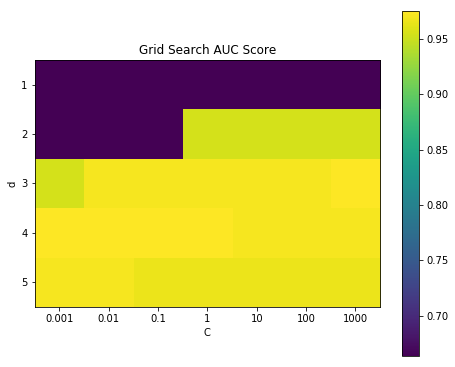

In [164]:
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(another)
plt.xlabel('C')
plt.ylabel('d')
plt.colorbar()
plt.xticks(np.arange(len(Cs)), Cs)
plt.yticks(np.arange(len(d)), d)
plt.title('Grid Search AUC Score')
plt.show()

In [165]:
#The best parameters were C =1 and Degree = 1, which had an accuracy of 97.56!!!
#The general trend I see is that as C goes up so does the accuracy.

In [166]:
svc = svm.SVC(C=1, gamma=0.1, probability=True)


In [167]:
svc.fit(X_train[['1000025','5','1.1','1.2','2','1.3','3','1.4','1.5']], y_train)
svc.score(X_test[['1000025','5','1.1','1.2','2','1.3','3','1.4','1.5']], y_test)

0.96585365853658534

In [168]:
data['Probability'] = svc.predict_proba(data[['1000025','5','1.1','1.2','2','1.3','3','1.4','1.5','2.1']])[:,0]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['5'], data['1.1'], s=30, c=data['Probability'], cmap='Reds')

ValueError: X.shape[1] = 10 should be equal to 9, the number of features at training time

# START OF TESTING

In [191]:
raw_covar = pd.read_csv('PatientsData.xls - PatientsData.csv.csv')
raw_covar.head(0)
raw_covar.dropna()
#raw_covar.values[0]

,Patient,Cumulus (DA) - unnormalized,Cumulus (DA) - normalized,Cumulus (PD) - unnormalized,Cumulus (PD) - normalized,Libra (DA) - unnormalized,Libraæ(DA) - normalized,Libra(PD) - unnormalized,Libra(PD) - normalized,Volpara (DA) - unnormalized,...,race,age,mens_status,parity,bmi,Ground truth,our MIRS,Our binary MIRS,Patient Name,Unnamed: 23
0,1.0,14.025080,0.064117,7.437008,0.120466,295.0,0.046964,272.0,0.046143,120712.0,...,1.0,5.0,3.0,1.0,354.0,1.0,1.000000,1.0,'MG11.dcm',1.0
1,2.0,0.000000,0.000000,0.000000,0.000000,356.0,0.048516,187.0,0.043058,92426.0,...,3.0,1.0,1.0,1.0,147.0,1.0,0.246667,0.0,'MG111_replacement.dcm',0.0
2,3.0,45.006323,0.094573,23.551121,0.214374,98.0,0.037864,147.0,0.041077,10100.0,...,1.0,7.0,3.0,5.0,108.0,1.0,0.413333,0.0,'MG113.dcm',0.0
3,4.0,0.000000,0.000000,0.000000,0.000000,278.0,0.046474,36.0,0.029497,74772.0,...,1.0,3.0,3.0,5.0,79.0,1.0,0.873333,1.0,'MG121_replacement.dcm',1.0
4,5.0,92.764367,0.120356,80.408153,0.396111,41.0,0.030667,240.0,0.045112,193370.0,...,1.0,3.0,1.0,3.0,31.0,1.0,0.393333,0.0,'MG128.dcm',0.0
5,6.0,32.542222,0.084883,22.179090,0.208036,418.0,0.049842,53.0,0.032680,84615.0,...,1.0,1.0,1.0,1.0,206.0,1.0,0.426667,0.0,'MG131.dcm',0.0
6,7.0,83.889312,0.116388,54.677571,0.326642,44.0,0.031251,236.0,0.044974,222705.0,...,3.0,2.0,1.0,3.0,179.0,1.0,0.913333,1.0,'MG134.dcm',1.0
7,8.0,27.919842,0.080658,20.887662,0.201889,367.0,0.048768,376.0,0.048808,118084.0,...,3.0,4.0,3.0,1.0,277.0,1.0,0.493333,0.0,'MG140.dcm',0.0
8,9.0,100.911520,0.123781,35.955963,0.264882,19.0,0.024316,331.0,0.047759,238050.0,...,1.0,3.0,1.0,3.0,355.0,1.0,0.973333,1.0,'MG146.dcm',1.0
9,10.0,47.261385,0.096126,63.653678,0.352435,366.0,0.048745,234.0,0.044904,87342.0,...,3.0,3.0,3.0,2.0,5.0,1.0,0.286667,0.0,'MG158.dcm',0.0


In [192]:
relevant_frame = raw_covar[['Cumulus (DA) - normalized','Cumulus (PD) - normalized','Libraæ(DA) - normalized','Libra(PD) - normalized','Volpara(PD) - normalized','BIRADS - unnormalized','race','age','mens_status','parity','bmi','Ground truth','Our binary MIRS']]
relevant_frame = relevant_frame.dropna()
relevant_frame
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(relevant_frame)
relevant_frame = pd.DataFrame(x_scaled)
relevant_frame.columns = [['Cumulus (DA) - normalized','Cumulus (PD) - normalized','Libraæ(DA) - normalized','Libra(PD) - normalized','Volpara(PD) - normalized','BIRADS - unnormalized','race','age','mens_status','parity','bmi','Ground truth','Our binary MIRS']]

In [193]:

X_train, X_test, y_train, y_test = train_test_split(relevant_frame[['Cumulus (DA) - normalized','Cumulus (PD) - normalized','Libraæ(DA) - normalized','Libra(PD) - normalized','Volpara(PD) - normalized','BIRADS - unnormalized','race','age','mens_status','parity','bmi','Our binary MIRS']], relevant_frame['Ground truth'], test_size=0.20, random_state=42)

#THIS Normalizes all the data
x = X_train.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_train = pd.DataFrame(x_scaled)

x = X_test.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_test = pd.DataFrame(x_scaled)
X_test.columns = ['Cumulus (DA) - normalized','Cumulus (PD) - normalized','Libraæ(DA) - normalized','Libra(PD) - normalized','Volpara(PD) - normalized','BIRADS - unnormalized','race','age','mens_status','parity','bmi','Our binary MIRS']
X_train.columns = ['Cumulus (DA) - normalized','Cumulus (PD) - normalized','Libraæ(DA) - normalized','Libra(PD) - normalized','Volpara(PD) - normalized','BIRADS - unnormalized','race','age','mens_status','parity','bmi','Our binary MIRS']

In [194]:
y = relevant_frame['Ground truth']
relevant_frame = relevant_frame.drop('Ground truth',axis=1)
relevant_frame.head(10)

,Cumulus (DA) - normalized,Cumulus (PD) - normalized,Libraæ(DA) - normalized,Libra(PD) - normalized,Volpara(PD) - normalized,BIRADS - unnormalized,race,age,mens_status,parity,bmi,Our binary MIRS
0,0.363651,0.277849,0.942257,0.928808,0.602955,0.50,0.000000,0.500,1.0,0.000,0.964481,1.0
1,0.000000,0.000000,0.973399,0.866726,0.798931,0.75,0.666667,0.000,0.0,0.000,0.398907,0.0
2,0.536382,0.494442,0.759669,0.826849,0.143962,0.50,0.000000,0.750,1.0,0.500,0.292350,0.0
3,0.000000,0.000000,0.932423,0.593742,0.650729,0.50,0.000000,0.250,1.0,0.500,0.213115,1.0
4,0.682616,0.913607,0.615290,0.908070,0.915419,0.75,0.000000,0.250,0.0,0.250,0.081967,0.0
5,0.481429,0.479823,1.000000,0.657825,0.593670,0.25,0.000000,0.000,0.0,0.000,0.560109,0.0
6,0.660113,0.753380,0.626991,0.905285,0.865957,0.75,0.666667,0.125,0.0,0.250,0.486339,1.0
7,0.457461,0.465644,0.978441,0.982455,0.699146,0.75,0.666667,0.375,1.0,0.000,0.754098,0.0
8,0.702042,0.610935,0.487855,0.961335,0.684914,0.50,0.000000,0.250,0.0,0.250,0.967213,1.0
9,0.545195,0.812870,0.977989,0.903875,0.855001,1.00,0.666667,0.250,1.0,0.125,0.010929,0.0


In [195]:
relevant_frame.head(15)

,Cumulus (DA) - normalized,Cumulus (PD) - normalized,Libraæ(DA) - normalized,Libra(PD) - normalized,Volpara(PD) - normalized,BIRADS - unnormalized,race,age,mens_status,parity,bmi,Our binary MIRS
0,0.363651,0.277849,0.942257,0.928808,0.602955,0.50,0.000000,0.500,1.0,0.000,0.964481,1.0
1,0.000000,0.000000,0.973399,0.866726,0.798931,0.75,0.666667,0.000,0.0,0.000,0.398907,0.0
2,0.536382,0.494442,0.759669,0.826849,0.143962,0.50,0.000000,0.750,1.0,0.500,0.292350,0.0
3,0.000000,0.000000,0.932423,0.593742,0.650729,0.50,0.000000,0.250,1.0,0.500,0.213115,1.0
4,0.682616,0.913607,0.615290,0.908070,0.915419,0.75,0.000000,0.250,0.0,0.250,0.081967,0.0
5,0.481429,0.479823,1.000000,0.657825,0.593670,0.25,0.000000,0.000,0.0,0.000,0.560109,0.0
6,0.660113,0.753380,0.626991,0.905285,0.865957,0.75,0.666667,0.125,0.0,0.250,0.486339,1.0
7,0.457461,0.465644,0.978441,0.982455,0.699146,0.75,0.666667,0.375,1.0,0.000,0.754098,0.0
8,0.702042,0.610935,0.487855,0.961335,0.684914,0.50,0.000000,0.250,0.0,0.250,0.967213,1.0
9,0.545195,0.812870,0.977989,0.903875,0.855001,1.00,0.666667,0.250,1.0,0.125,0.010929,0.0


In [196]:
from sklearn import svm, grid_search
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    gammas = [0.001, 0.01, 0.1, 1, 10, 100]
    d = [1,2,3,4,5]
    param_grid = {'C': Cs, 'gamma' : gammas,'degree':d}
    search = grid_search.GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    search.fit(X, y)
    search.best_params_
    return search.best_params_

In [197]:
svc_param_selection(X_train[['Cumulus (DA) - normalized','Cumulus (PD) - normalized','Libraæ(DA) - normalized','Libra(PD) - normalized','Volpara(PD) - normalized','BIRADS - unnormalized','race','age','mens_status','parity','bmi','Our binary MIRS']], y_train, 5)

{'C': 100, 'degree': 1, 'gamma': 0.1}

In [198]:
svc = svm.SVC(C=100, gamma=0.1, probability=True)


In [199]:
svc.fit(X_train[['Cumulus (DA) - normalized','Cumulus (PD) - normalized','Libraæ(DA) - normalized','Libra(PD) - normalized','Volpara(PD) - normalized','BIRADS - unnormalized','race','age','mens_status','parity','bmi','Our binary MIRS']], y_train)
svc.score(X_test[['Cumulus (DA) - normalized','Cumulus (PD) - normalized','Libraæ(DA) - normalized','Libra(PD) - normalized','Volpara(PD) - normalized','BIRADS - unnormalized','race','age','mens_status','parity','bmi','Our binary MIRS']], y_test)

0.78048780487804881

In [213]:
scores = cross_val_score(tempsvm, relevant_frame, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.76 (+/- 0.09)


/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:21

In [212]:
d = [1,2,3,4,5]
accuracies = np.array([])
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
for i in Cs:
    for j in d :
        tempsvm = svm.SVC(C=i,degree=j, max_iter=5000)
        tempsvm.fit(X_train[['Cumulus (DA) - normalized','Cumulus (PD) - normalized','Libraæ(DA) - normalized','Libra(PD) - normalized','Volpara(PD) - normalized','BIRADS - unnormalized','race','age','mens_status','parity','bmi','Our binary MIRS']],y_train)
        accuracy= cross_val_score(tempsvm, relevant_frame, y, cv=20).mean()
        accuracies = np.append(accuracies,accuracy)
print(accuracies)

/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:21

/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:21

/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:21

[ 0.67850877  0.67850877  0.67850877  0.67850877  0.67850877  0.67850877
  0.67850877  0.67850877  0.67850877  0.67850877  0.67850877  0.67850877
  0.67850877  0.67850877  0.67850877  0.74070175  0.74070175  0.74070175
  0.74070175  0.74070175  0.80321429  0.80321429  0.80321429  0.80321429
  0.80321429  0.78919173  0.78919173  0.78919173  0.78919173  0.78919173
  0.78670426  0.78670426  0.78670426  0.78670426  0.78670426]


/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:21

In [214]:
another = accuracies.reshape(5,7)
print(another)

[[ 0.67850877  0.67850877  0.67850877  0.67850877  0.67850877  0.67850877
   0.67850877]
 [ 0.67850877  0.67850877  0.67850877  0.67850877  0.67850877  0.67850877
   0.67850877]
 [ 0.67850877  0.74070175  0.74070175  0.74070175  0.74070175  0.74070175
   0.80321429]
 [ 0.80321429  0.80321429  0.80321429  0.80321429  0.78919173  0.78919173
   0.78919173]
 [ 0.78919173  0.78919173  0.78670426  0.78670426  0.78670426  0.78670426
   0.78670426]]


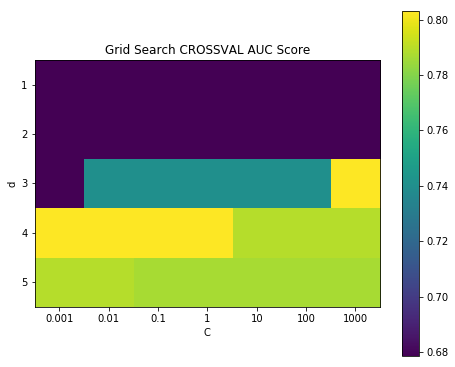

In [215]:
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(another)
plt.xlabel('C')
plt.ylabel('d')
plt.colorbar()
plt.xticks(np.arange(len(Cs)), Cs)
plt.yticks(np.arange(len(d)), d)
plt.title('Grid Search CROSSVAL AUC Score')
plt.show()

In [216]:
d = [1,2,3,4,5]
accuracies = np.array([])
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
for i in Cs:
    for j in d :
        tempsvm = svm.SVC(C=i,degree=j, max_iter=5000)
        tempsvm.fit(X_train[['Cumulus (DA) - normalized','Cumulus (PD) - normalized','Libraæ(DA) - normalized','Libra(PD) - normalized','Volpara(PD) - normalized','BIRADS - unnormalized','race','age','mens_status','parity','bmi','Our binary MIRS']],y_train)
        accuracy= tempsvm.score(X_test[['Cumulus (DA) - normalized','Cumulus (PD) - normalized','Libraæ(DA) - normalized','Libra(PD) - normalized','Volpara(PD) - normalized','BIRADS - unnormalized','race','age','mens_status','parity','bmi','Our binary MIRS']], y_test)
        accuracies = np.append(accuracies,accuracy)
print(accuracies)

[ 0.67073171  0.67073171  0.67073171  0.67073171  0.67073171  0.67073171
  0.67073171  0.67073171  0.67073171  0.67073171  0.67073171  0.67073171
  0.67073171  0.67073171  0.67073171  0.80487805  0.80487805  0.80487805
  0.80487805  0.80487805  0.82926829  0.82926829  0.82926829  0.82926829
  0.82926829  0.7804878   0.7804878   0.7804878   0.7804878   0.7804878
  0.80487805  0.80487805  0.80487805  0.80487805  0.80487805]


/anaconda/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [217]:
tempsvm = svm.SVC(C=1,degree=4,gamma=0.1, max_iter=5000)
tempsvm.fit(X_train[['Cumulus (DA) - normalized','Cumulus (PD) - normalized','Libraæ(DA) - normalized','Libra(PD) - normalized','Volpara(PD) - normalized','BIRADS - unnormalized','race','age','mens_status','parity','bmi','Our binary MIRS']],y_train)
tempsvm.score(X_test[['Cumulus (DA) - normalized','Cumulus (PD) - normalized','Libraæ(DA) - normalized','Libra(PD) - normalized','Volpara(PD) - normalized','BIRADS - unnormalized','race','age','mens_status','parity','bmi','Our binary MIRS']], y_test)

0.80487804878048785

In [218]:
another = accuracies.reshape(5,7)
print(another)

[[ 0.67073171  0.67073171  0.67073171  0.67073171  0.67073171  0.67073171
   0.67073171]
 [ 0.67073171  0.67073171  0.67073171  0.67073171  0.67073171  0.67073171
   0.67073171]
 [ 0.67073171  0.80487805  0.80487805  0.80487805  0.80487805  0.80487805
   0.82926829]
 [ 0.82926829  0.82926829  0.82926829  0.82926829  0.7804878   0.7804878
   0.7804878 ]
 [ 0.7804878   0.7804878   0.80487805  0.80487805  0.80487805  0.80487805
   0.80487805]]


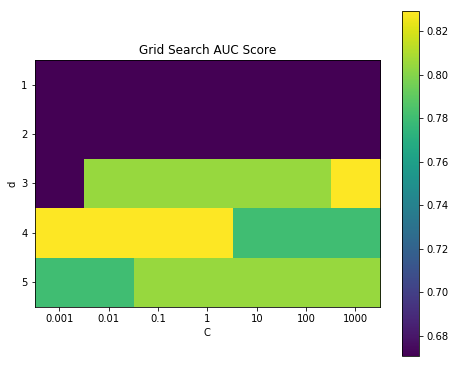

In [219]:
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(another)
plt.xlabel('C')
plt.ylabel('d')
plt.colorbar()
plt.xticks(np.arange(len(Cs)), Cs)
plt.yticks(np.arange(len(d)), d)
plt.title('Grid Search AUC Score')
plt.show()

In [207]:
from sklearn.model_selection import cross_val_score
relevant_frame.head(10)
scores = cross_val_score(tempsvm, relevant_frame, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.73 (+/- 0.18)
